In [ ]:
!nvidia-smi

Tue Dec 21 03:32:19 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Download, ZIP Dataset and remove file not needed

In [ ]:
import os

# setting akun kaggle
os.environ['KAGGLE_USERNAME'] = 'daynos'
os.environ['KAGGLE_KEY'] = 'KAGGLE_KEY'

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database

 99% 740M/745M [00:08<00:00, 53.1MB/s]
100% 745M/745M [00:08<00:00, 94.7MB/s]


In [ ]:
!unzip /content/covid19-radiography-database.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6710.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6711.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6712.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6713.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6714.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6715.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6716.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6717.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6718.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6719.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-672.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6720.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6721.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6722.png  
  inflating:

In [ ]:
import cv2
import matplotlib.pyplot as plt


img1 = cv2.imread('/content/COVID-19_Radiography_Dataset/COVID/COVID-1000.png', cv2.IMREAD_GRAYSCALE)
img2 = get_negativeT(img1)
gaus=cv2.GaussianBlur(img2,(5,5), 0)
dir_pre = 'afterpreprocessing2.png'
cv2.imwrite(dir_pre, gaus)

True

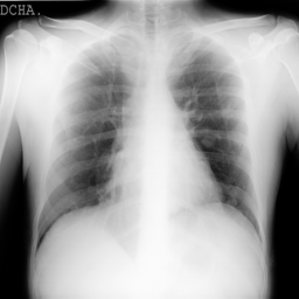

In [ ]:
from PIL import Image
img = Image.open('/content/COVID-19_Radiography_Dataset/COVID/COVID-1000.png')
img

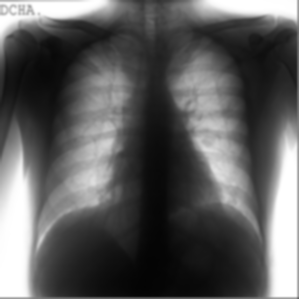

In [ ]:
img_ap = Image.open('/content/afterpreprocessing2.png')
img_ap

In [ ]:
os.listdir('/content/COVID-19_Radiography_Dataset')

['Viral Pneumonia.metadata.xlsx',
 'Normal.metadata.xlsx',
 'Normal',
 'Viral Pneumonia',
 'COVID',
 'COVID.metadata.xlsx',
 'Lung_Opacity',
 'Lung_Opacity.metadata.xlsx',
 'README.md.txt']

In [ ]:
# hapus file tidak terpakai
!rm -rf /content/COVID-19_Radiography_Dataset/COVID.metadata.xlsx
!rm -rf /content/COVID-19_Radiography_Dataset/Lung_Opacity.metadata.xlsx
!rm -rf /content/COVID-19_Radiography_Dataset/Normal.metadata.xlsx
!rm -rf "/content/COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx"
!rm -rf /content/COVID-19_Radiography_Dataset/README.md.txt

In [ ]:
# hapus class Lung_Opacity karena hanya ingin menggunakan 3 class saja.
!rm -rf /content/COVID-19_Radiography_Dataset/Lung_Opacity

In [ ]:
os.listdir('/content/COVID-19_Radiography_Dataset/')

['Normal', 'Viral Pneumonia', 'COVID']

# Fungsi Negative Transformation

In [ ]:
# function from image to Negative Transform
def get_negativeT_image(img):
  # Read pixels and apply negative transformation
  for i in range(0, img.size[0]-1):
      for j in range(0, img.size[1]-1):
          # Get pixel value at (x,y) position of the image
          pixelColorVals = img.getpixel((i,j));
          if type(pixelColorVals) is tuple:
            pixelColorVals = pixelColorVals[0]
          # Invert color
          pixel    = 255 - pixelColorVals; # Negate pixel
          # Modify the image with the inverted pixel values
          img.putpixel((i,j),(pixel));
  return img

# function from array image to Negative Transform
def get_negativeT(img):
  # Read pixels and apply negative transformation
  for i in range(0, img.shape[0]-1):
      for j in range(0, img.shape[1]-1):
          # Get pixel value at (x,y) position of the image
          img[i][j] = 255 - img[i][j]
  return img

# Create new directory for image after & before negative tranformation

In [ ]:
!mkdir '/content/Dataset_Without_preprocessing'
!mkdir '/content/Dataset_Without_preprocessing/COVID'
!mkdir '/content/Dataset_Without_preprocessing/Normal'
!mkdir '/content/Dataset_Without_preprocessing/Viral Pneumonia'

In [ ]:
!mkdir '/content/Dataset_With_preprocessing'
!mkdir '/content/Dataset_With_preprocessing/COVID'
!mkdir '/content/Dataset_With_preprocessing/Normal'
!mkdir '/content/Dataset_With_preprocessing/Viral Pneumonia'

# Move Dataset after & before preprocessing

## move each label image without preprocessing

In [ ]:
# COVID
dir_i = os.listdir('/content/COVID-19_Radiography_Dataset/COVID')
x = 0
for i in dir_i:
  if x > 361:
    break
  str = os.path.join('/content/COVID-19_Radiography_Dataset/COVID', i)
  !mv "{str}" "/content/Dataset_Without_preprocessing/COVID"
  x += 1
print(len(os.listdir('/content/Dataset_Without_preprocessing/COVID')))

In [ ]:
# Normal
dir_i = os.listdir('/content/COVID-19_Radiography_Dataset/Normal')
x = 0
for i in dir_i:
  if x > 1020:
    break
  str = os.path.join('/content/COVID-19_Radiography_Dataset/Normal', i)
  !mv "{str}" "/content/Dataset_Without_preprocessing/Normal"
  x += 1
print(len(os.listdir('/content/Dataset_Without_preprocessing/Normal')))

In [ ]:
# Viral Pneumonia
dir_i = os.listdir('/content/COVID-19_Radiography_Dataset/Viral Pneumonia')
x = 0
for i in dir_i:
  if x > 134:
    break
  str = os.path.join('/content/COVID-19_Radiography_Dataset/Viral Pneumonia', i)
  !mv "{str}" "/content/Dataset_Without_preprocessing/Viral Pneumonia"
  x += 1
print(len(os.listdir('/content/Dataset_Without_preprocessing/Viral Pneumonia')))

## move each label image with Gaussian Low pass Filter

In [ ]:
import cv2

dir_img = '/content/COVID-19_Radiography_Dataset/COVID'
x = 0

for i in os.listdir(dir_img):
  img = os.path.join(dir_img, i)
  img1 = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
  img2 = get_negativeT(img1)
  gaus=cv2.GaussianBlur(img2,(5,5), 0)
  dir_pre = f"/content/Dataset_With_preprocessing/COVID/COVID-{x}"
  cv2.imwrite(dir_pre + ".png", gaus)
  x += 1
print(len(os.listdir('/content/Dataset_With_preprocessing/COVID')))

3616


In [ ]:
# !rm -rf '/content/Dataset_With_preprocessing/Normal'

# !mkdir '/content/Dataset_With_preprocessing/Normal'

In [ ]:
import cv2

dir_img = '/content/COVID-19_Radiography_Dataset/Normal'
x = 0

for i in os.listdir(dir_img):
  img = os.path.join(dir_img, i)
  img1 = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
  img2 = get_negativeT(img1)
  gaus=cv2.GaussianBlur(img2,(5,5),0)
  dir_pre = f"/content/Dataset_With_preprocessing/Normal/Normal-{x}"
  cv2.imwrite(dir_pre + ".png", gaus)
  x += 1
print(len(os.listdir('/content/Dataset_With_preprocessing/Normal')))

10192


In [ ]:
import cv2

dir_img = '/content/COVID-19_Radiography_Dataset/Viral Pneumonia'
x = 0

for i in os.listdir(dir_img):
  img = os.path.join(dir_img, i)
  img1 = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
  img2 = get_negativeT(img1)
  gaus=cv2.GaussianBlur(img2,(5,5),0)
  dir_pre = f"/content/Dataset_With_preprocessing/Viral Pneumonia/Viral Pneumonia-{x}"
  cv2.imwrite(dir_pre + ".png", gaus)
  x += 1
print(len(os.listdir('/content/Dataset_With_preprocessing/Viral Pneumonia')))

1345


# Save Data for Training later

In [ ]:
! du -sh '/content/Dataset_With_preprocessing'

613M	/content/Dataset_With_preprocessing


In [ ]:
!zip -r '/content/"Dataset_preprocessing.zip"' '/content/Dataset_With_preprocessing'

Streaming output truncated to the last 5000 lines.
  adding: content/Dataset_With_preprocessing/Normal/Normal-2134.png (deflated 4%)
  adding: content/Dataset_With_preprocessing/Normal/Normal-3751.png (deflated 4%)
  adding: content/Dataset_With_preprocessing/Normal/Normal-9873.png (deflated 3%)
  adding: content/Dataset_With_preprocessing/Normal/Normal-4154.png (deflated 4%)
  adding: content/Dataset_With_preprocessing/Normal/Normal-224.png (deflated 3%)
  adding: content/Dataset_With_preprocessing/Normal/Normal-10165.png (deflated 4%)
  adding: content/Dataset_With_preprocessing/Normal/Normal-1652.png (deflated 3%)
  adding: content/Dataset_With_preprocessing/Normal/Normal-5426.png (deflated 3%)
  adding: content/Dataset_With_preprocessing/Normal/Normal-7733.png (deflated 3%)
  adding: content/Dataset_With_preprocessing/Normal/Normal-9333.png (deflated 3%)
  adding: content/Dataset_With_preprocessing/Normal/Normal-3137.png (deflated 3%)
  adding: content/Dataset_With_preprocessing/No